In [163]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

In [164]:
data = pd.read_csv('fruits_dataset.data')
data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [165]:
data.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [166]:
data.value_counts("fruit_name")

fruit_name
apple       19
orange      19
lemon       16
mandarin     5
Name: count, dtype: int64

In [167]:
features = data.iloc[:, 3:6]
label= data.iloc[:, 1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
features,label, test_size=0.2, random_state=0
)
print('Jumlah data train' ,X_train.shape[0])
print('Jumlah data test', y_test.shape[0])

Jumlah data train 47
Jumlah data test 12


In [168]:
knn = KNeighborsClassifier(n_neighbors = 5, weights="distance")
knn.fit(X_train, y_train)
train_acc = knn.score(X_train, y_train)
print("The accuracy Of KNN classifier on training data is : {:.3f}".format(train_acc))

The accuracy Of KNN classifier on training data is : 1.000


In [169]:
knn_test_acc = knn.score(X_test, y_test)
print("The accuracy Of KNN classifier on test data is : {:.3f}".format(knn_test_acc))

The accuracy Of KNN classifier on test data is : 0.667


In [170]:
import pickle
with open('knn_model.pickle', 'wb') as f:
    pickle.dump(knn, f)

In [171]:
with open('knn_model.pickle', 'rb') as f:
    model = pickle.load(f)

new_data =[80, 5.8, 4.5]
X= np.array([new_data])
prediction = model.predict(X)

print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['mandarin']


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


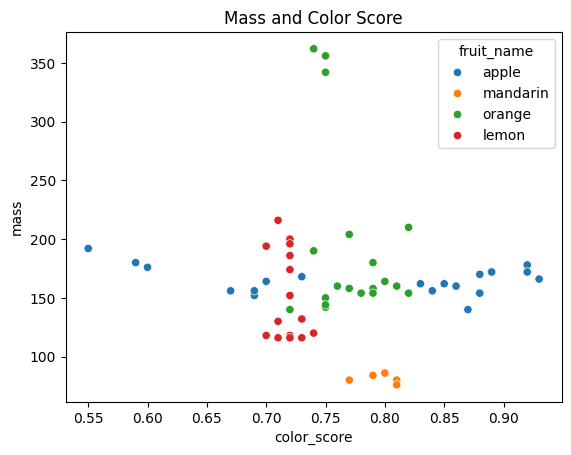

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fruits = pd.read_csv('fruits_dataset.data')

sns.scatterplot(x='color_score', y='mass', hue='fruit_name', data=fruits)
plt.title('Mass and Color Score')
plt.show()

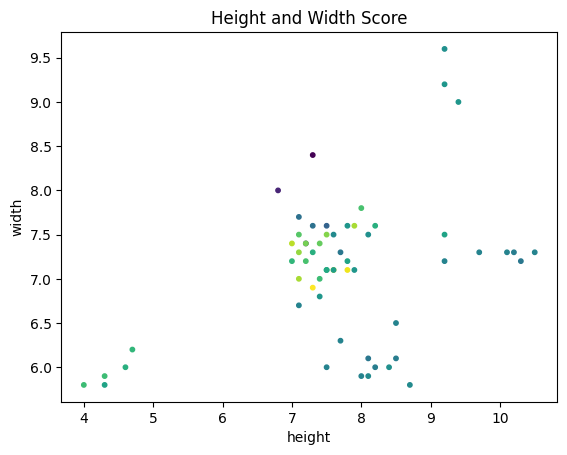

In [173]:
import matplotlib.pyplot as plt
import pandas as pd

fruits = pd.read_csv('fruits_dataset.data')

plt.figure()
plt.scatter(fruits['height'], fruits['width'], c=fruits['color_score'], s=10)
plt.title('Height and Width Score')
plt.xlabel('height')
plt.ylabel('width')
plt.show()

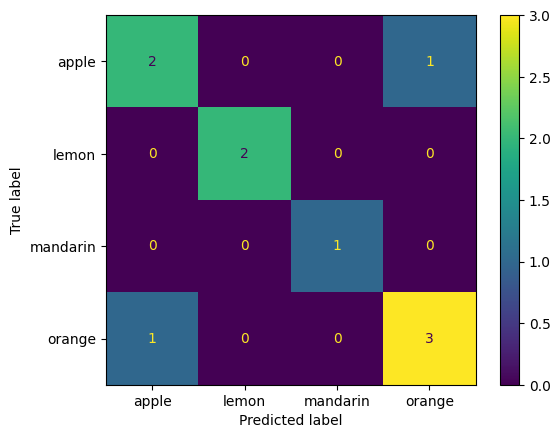

In [174]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = ['apple', 'lemon', 'mandarin', 'orange', 'apple', 'lemon', 'orange', 'orange', 'orange', 'apple']
y_pred = ['apple', 'lemon', 'mandarin', 'orange', 'apple', 'lemon', 'orange', 'orange', 'apple', 'orange']

cm = confusion_matrix(y_true, y_pred, labels=['apple', 'lemon', 'mandarin', 'orange'])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['apple', 'lemon', 'mandarin', 'orange'])
disp.plot()
plt.show()